## Práctico 5 - Aprendizaje automático
### Parte 2: Aprendizaje supervisado. CSV: `Clientes shopping`

1. Preprocesar los datos incluyendo la normalización de los mismos.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, widgetsnbextension
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
df = pd.read_csv('clientes_shopping.csv')
df.info()
for col in df.columns:
    print(f'{col}: {df[col].nunique()}')
# Seleccionar columnas de interés
datos = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalizar los datos
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
CustomerID: 200
Gender: 2
Age: 51
Annual Income (k$): 64
Spending Score (1-100): 84


2. Realizar los siguientes gráficos de dispersión:
   - **a.** Anual Income (k$) vs Spending Score (1-100)
   - **b.** Age vs Spending Score (1-100)
   - **c.** Age vs Anual Income (k$)


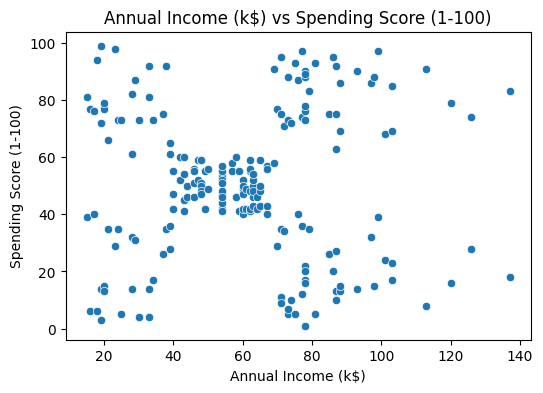

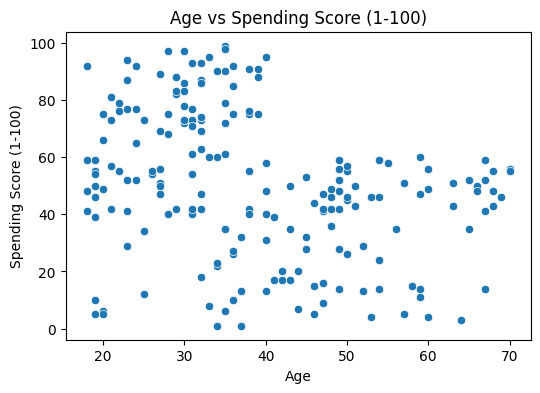

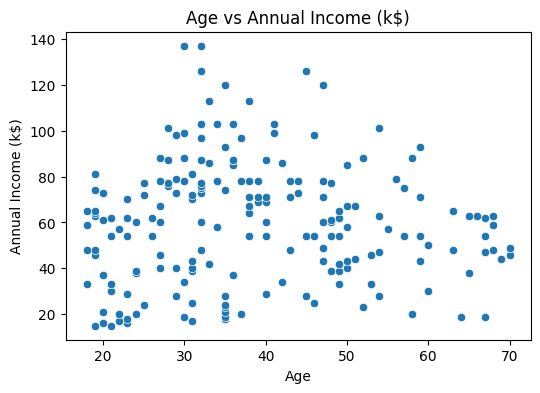

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico Anual Income (k$) vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.title("Annual Income (k$) vs Spending Score (1-100)")
plt.show()

# Gráfico Age vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'])
plt.title("Age vs Spending Score (1-100)")
plt.show()

# Gráfico Age vs Annual Income (k$)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'])
plt.title("Age vs Annual Income (k$)")
plt.show()


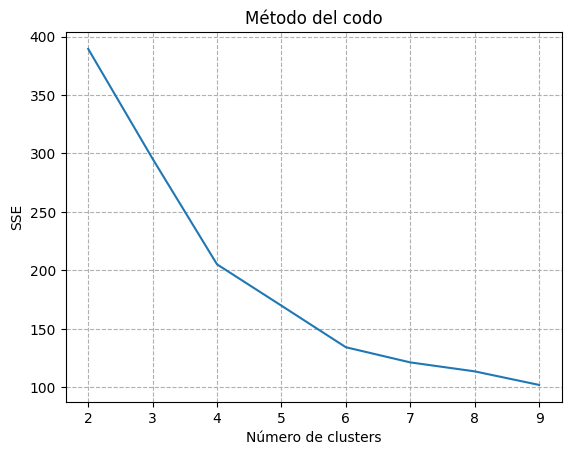

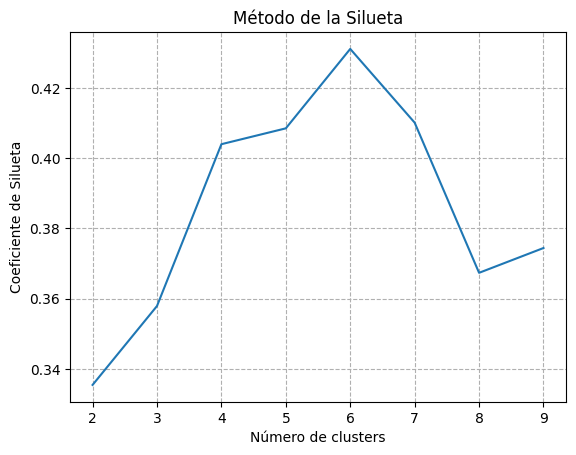

In [15]:
# Función para calcular el método del codo
def metodo_codo(data, max_clusters=10):
    sse = []
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
    plt.plot(range(2, max_clusters), sse)
    plt.xlabel('Número de clusters')
    plt.ylabel('SSE')
    plt.title('Método del codo')
    plt.grid(linestyle='--')
    plt.show()

def metodo_silueta(data, max_clusters=10):
    silhouette = []
    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        silhouette.append(silhouette_score(data, kmeans.labels_))
    plt.plot(range(2, max_clusters), silhouette)
    plt.xlabel('Número de clusters')
    plt.ylabel('Coeficiente de Silueta')
    plt.title('Método de la Silueta')
    plt.grid(linestyle='--')
    plt.show()

metodo_codo(datos_normalizados, 10)
metodo_silueta(datos_normalizados, 10)

3. Aplicar el modelo elegido, evaluar cuál es la cantidad de clusters adecuada a 
utilizar y una medida de distancia adecuada.

>-  Para el método del codo me sirve el valor de k donde la pendiente se hace cada vez menor.
>-  Para el método de la silueta me sirve el valor de k donde el coeficiente es máximo.
$\Rightarrow$ me sirve k = 6.

4. Crear nuevamente los gráficos solicitados, esta vez coloreando los clusters 
predichos. 

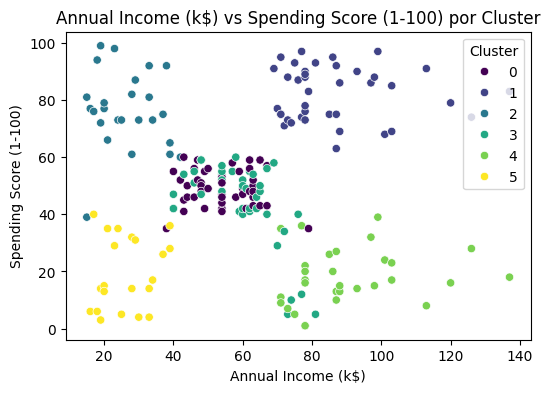

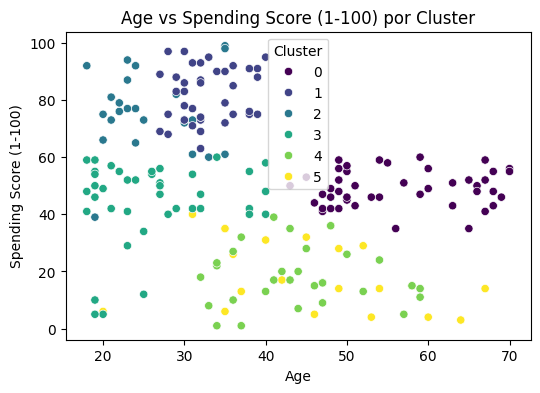

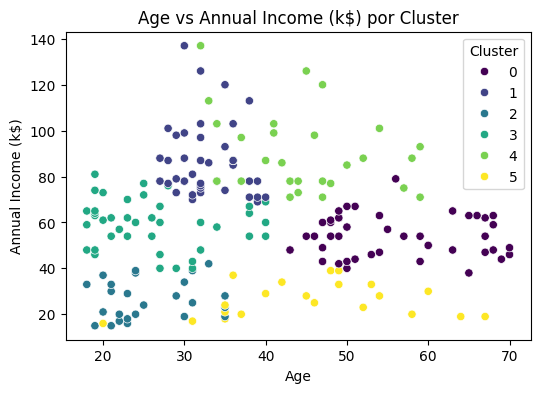

In [16]:
# Aplicar K-means con el número óptimo de clusters
k_optimo = 6  # Ajusta según los resultados obtenidos
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['Cluster'] = kmeans.fit_predict(datos_normalizados)

# Graficar los clusters con color
# Anual Income (k$) vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title("Annual Income (k$) vs Spending Score (1-100) por Cluster")
plt.show()

# Age vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title("Age vs Spending Score (1-100) por Cluster")
plt.show()

# Age vs Annual Income (k$)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Cluster'], palette='viridis')
plt.title("Age vs Annual Income (k$) por Cluster")
plt.show()


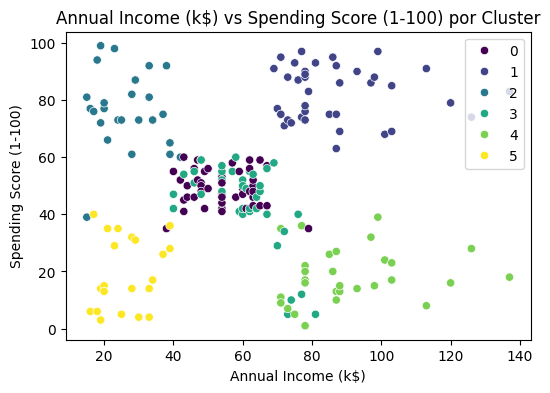

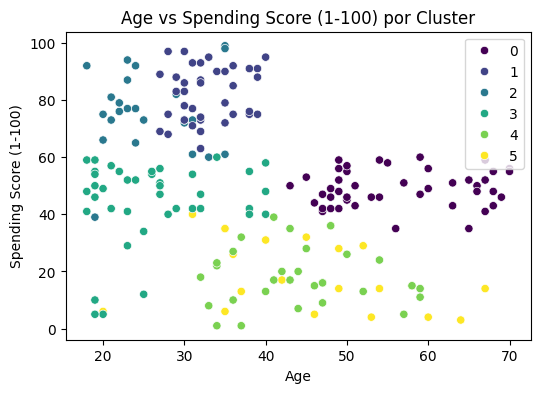

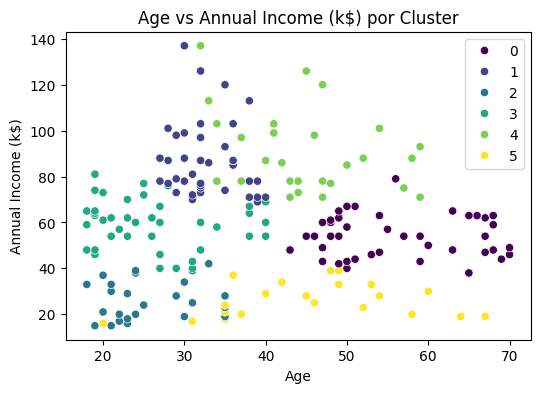

In [19]:
# Aplicar K-means con el número óptimo de clusters
k_optimo = 6  # Ajusta según los resultados obtenidos
kmeans = KMeans(n_clusters=k_optimo, random_state=42)
df['Cluster'] = kmeans.fit_predict(datos_normalizados)

# Graficar los clusters con color
# Anual Income (k$) vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title("Annual Income (k$) vs Spending Score (1-100) por Cluster")
plt.legend(loc='upper right')
plt.show()

# Age vs Spending Score (1-100)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='viridis')
plt.title("Age vs Spending Score (1-100) por Cluster")
plt.legend(loc='upper right')
plt.show()

# Age vs Annual Income (k$)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['Age'], y=df['Annual Income (k$)'], hue=df['Cluster'], palette='viridis')
plt.title("Age vs Annual Income (k$) por Cluster")
plt.legend(loc='upper right')
plt.show()


### Ploteo Interactivo: 
Como observamos que los gráficos para la parte anterior eran los mismos pero con sus ejes rotados, lo podemos visualizar mejor con un gráfico 3D.

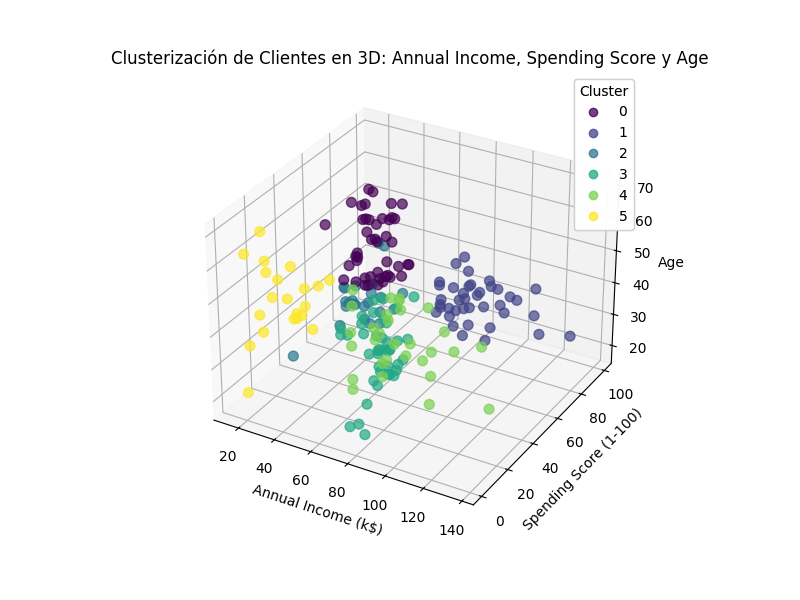

In [20]:
# Asegúrate de ejecutar esto primero en una celda para activar la interactividad
%matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura y un subplot 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D combinando las tres variables: 'Annual Income', 'Spending Score' y 'Age'
scatter = ax.scatter(
    df['Annual Income (k$)'],   # Eje X
    df['Spending Score (1-100)'],  # Eje Y
    df['Age'],                  # Eje Z
    c=df['Cluster'],            # Color por cluster
    cmap='viridis', s=50, alpha=0.7
)

# Etiquetas y título
ax.set_xlabel("Annual Income (k$)")
ax.set_ylabel("Spending Score (1-100)")
ax.set_zlabel("Age")
ax.set_title("Clusterización de Clientes en 3D: Annual Income, Spending Score y Age")

# Añadir leyenda
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()
